# Exercise 2

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)

He studied each of the $10$ army corps year by year, i.e., because the years are $20$ we have $20$ observations for each corp. Therefore, we have a total number of observations equal to $200$.

The previous table states: there are $109$ groups with $0$ deaths, $65$ groups with $1$ death, $22$ with $2$ deaths, $3$ with $3$ deaths and $1$ with $4$ deaths. The total number of deaths is $65*1+22*2+3*3+1*4 = 122$ (as wanted), while the total number of corps is $109+65+22+3+1 = 200$.

In [1]:
import numpy as np
import scipy.stats
import pylab as plt
import math

I initialize two arrays containing the number of corps with the corresponding number of deaths. I compute the probability by dividing each number of group with the total number of observations, and I plot the probability of the groups with the corresponding number of deaths.

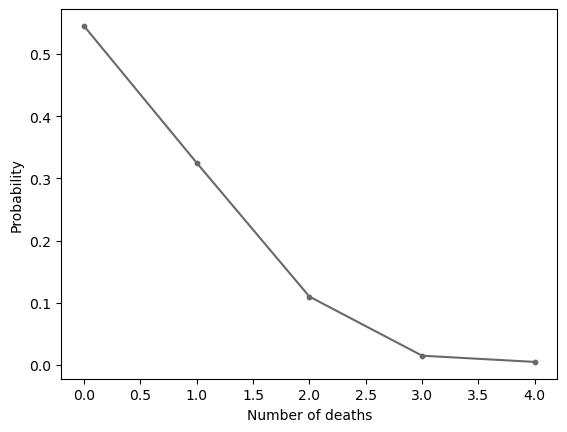

In [2]:
totDeaths = 122
obs = 200

corps = [109, 65, 22, 3, 1]
deaths = [0, 1, 2, 3, 4]

prob = []
for c in corps:
    prob.append(c/obs)

plt.scatter(deaths, prob, s=10, color='dimgrey')
plt.plot(deaths, prob, color='dimgrey')
plt.xlabel('Number of deaths')
plt.ylabel('Probability')
plt.show()

1. There is a higher probability towards $0$ and $1$ deaths, with a small number of groups having more deaths.
2. More than the half of the corps, about $55 \%$, have zero deaths.

Because a Poisson distribution describes the probability of rare events, I can use such distribution to fit these data. In this case the rare event is the death because of the kick of a horse. I try to fit by hand the data and I define a $\mu$ equal to $\mu=0.61$.

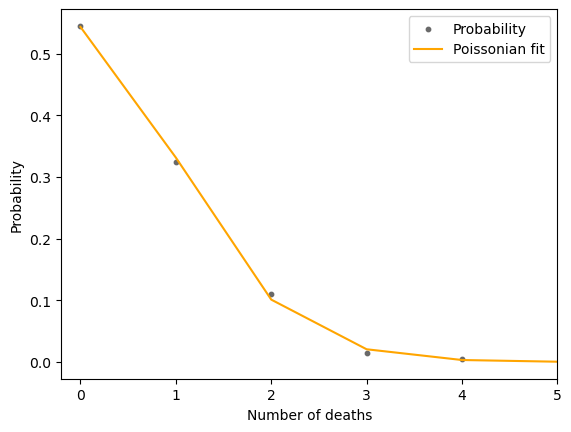

In [3]:
N = 100000
mu = 0.61  # value chosen by hand

dist = scipy.stats.poisson(mu)
x = dist.rvs(N)
x.sort()
y = dist.pmf(x)

plt.scatter(deaths, prob, s=10, color='dimgrey', label='Probability')
plt.plot(x, y, color='orange', label='Poissonian fit')
plt.xlim(-0.2, 5)
plt.xlabel('Number of deaths')
plt.ylabel('Probability')
plt.legend()
plt.show()